<a href="https://colab.research.google.com/github/Mozuha/Oxford-Flower-102-Prediction/blob/master/oxflower_fromLocal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, GlobalAveragePooling2D, BatchNormalization, UpSampling2D
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
AUTOTUNE = tf.data.experimental.AUTOTUNE

from __future__ import absolute_import, division, print_function, unicode_literals
try:
  %tensorflow_version 2.x
except Exception:
  pass
%load_ext tensorboard

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

import random

In [ ]:
num_classes = 102
batch_size = 32
img_size = 224
epochs = 100
num_train = 6551
num_val = 1638

In [ ]:
train_dir = '/content/drive/My Drive/X_train'
val_dir = '/content/drive/My Drive/X_test'

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=45,
    width_shift_range=.15,
    height_shift_range=.15,
    horizontal_flip=True,
    vertical_flip=True,
    zoom_range=0.5,
    shear_range=0.2
    )
    
val_datagen = ImageDataGenerator(rescale=1.0/255)

train_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_size, img_size),
    color_mode='rgb',
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

val_gen = val_datagen.flow_from_directory(
    val_dir,
    target_size=(img_size, img_size),
    color_mode='rgb',
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

Found 6556 images belonging to 102 classes.
Found 1638 images belonging to 102 classes.


In [ ]:
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

94773248/94765736 [==============================] - 1s 0us/step


In [ ]:
base_model.trainable = True

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(2048, activation='relu')(x)
x = BatchNormalization()(x)
x = Dense(1024, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
outputs = Dense(num_classes, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=outputs)

model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=1e-5),
             loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])
             
# model.summary()

In [ ]:
%%time
tbcb = tf.keras.callbacks.TensorBoard(log_dir='oxflower_Res_log15', histogram_freq=1)
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=3)

history = model.fit(
    train_gen,
    steps_per_epoch=num_train//batch_size,
    epochs=epochs,
    validation_data=val_gen,
    validation_steps=num_val//batch_size,
    callbacks=[tbcb, es]
)

Epoch 1/100
204/204 [==============================] - 124s 608ms/step - loss: 4.6231 - accuracy: 0.0146 - val_loss: 4.6261 - val_accuracy: 0.0080
Epoch 2/100
204/204 [==============================] - 122s 598ms/step - loss: 4.6054 - accuracy: 0.0422 - val_loss: 4.6257 - val_accuracy: 0.0092
Epoch 3/100
204/204 [==============================] - 122s 596ms/step - loss: 4.5633 - accuracy: 0.0907 - val_loss: 4.6132 - val_accuracy: 0.0398
Epoch 4/100
204/204 [==============================] - 122s 597ms/step - loss: 4.5285 - accuracy: 0.1318 - val_loss: 4.5131 - val_accuracy: 0.1679
Epoch 5/100
204/204 [==============================] - 121s 595ms/step - loss: 4.4838 - accuracy: 0.1815 - val_loss: 4.4128 - val_accuracy: 0.2543
Epoch 6/100
204/204 [==============================] - 121s 594ms/step - loss: 4.4331 - accuracy: 0.2338 - val_loss: 4.3703 - val_accuracy: 0.2788
Epoch 7/100
204/204 [==============================] - 121s 595ms/step - loss: 4.3912 - accuracy: 0.2747 - val_loss: 4

In [ ]:
%%time
tbcb = tf.keras.callbacks.TensorBoard(log_dir='oxflower_Res_log15', histogram_freq=1)
# es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=3)

history = model.fit(
    train_gen,
    steps_per_epoch=num_train//batch_size,
    epochs=20,
    validation_data=val_gen,
    validation_steps=num_val//batch_size,
    callbacks=[tbcb]
)

Epoch 1/20
204/204 [==============================] - 122s 599ms/step - loss: 3.7374 - accuracy: 0.9131 - val_loss: 3.7281 - val_accuracy: 0.9179
Epoch 2/20
204/204 [==============================] - 122s 598ms/step - loss: 3.7344 - accuracy: 0.9157 - val_loss: 3.7283 - val_accuracy: 0.9154
Epoch 3/20
204/204 [==============================] - 122s 599ms/step - loss: 3.7334 - accuracy: 0.9166 - val_loss: 3.7271 - val_accuracy: 0.9173
Epoch 4/20
204/204 [==============================] - 123s 604ms/step - loss: 3.7293 - accuracy: 0.9206 - val_loss: 3.7269 - val_accuracy: 0.9179
Epoch 5/20
204/204 [==============================] - 122s 599ms/step - loss: 3.7298 - accuracy: 0.9201 - val_loss: 3.7266 - val_accuracy: 0.9161
Epoch 6/20
204/204 [==============================] - 123s 602ms/step - loss: 3.7255 - accuracy: 0.9244 - val_loss: 3.7208 - val_accuracy: 0.9252
Epoch 7/20
204/204 [==============================] - 123s 601ms/step - loss: 3.7245 - accuracy: 0.9250 - val_loss: 3.7233 -

In [ ]:
%%time
tbcb = tf.keras.callbacks.TensorBoard(log_dir='oxflower_Res_log15', histogram_freq=1)
# es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=3)

history = model.fit(
    train_gen,
    steps_per_epoch=num_train//batch_size,
    epochs=13,
    validation_data=val_gen,
    validation_steps=num_val//batch_size,
    callbacks=[tbcb]
)  # 110 epochs in total

Epoch 1/13
204/204 [==============================] - 123s 603ms/step - loss: 3.6945 - accuracy: 0.9542 - val_loss: 3.7028 - val_accuracy: 0.9430
Epoch 2/13
204/204 [==============================] - 122s 600ms/step - loss: 3.6963 - accuracy: 0.9529 - val_loss: 3.7012 - val_accuracy: 0.9449
Epoch 3/13
204/204 [==============================] - 122s 598ms/step - loss: 3.6944 - accuracy: 0.9520 - val_loss: 3.6993 - val_accuracy: 0.9467
Epoch 4/13
204/204 [==============================] - 122s 600ms/step - loss: 3.6937 - accuracy: 0.9551 - val_loss: 3.7017 - val_accuracy: 0.9430
Epoch 5/13
204/204 [==============================] - 123s 601ms/step - loss: 3.6938 - accuracy: 0.9543 - val_loss: 3.6998 - val_accuracy: 0.9455
Epoch 6/13
204/204 [==============================] - 123s 603ms/step - loss: 3.6946 - accuracy: 0.9529 - val_loss: 3.6965 - val_accuracy: 0.9510
Epoch 7/13
204/204 [==============================] - 122s 600ms/step - loss: 3.6908 - accuracy: 0.9565 - val_loss: 3.7019 -

In [ ]:
%%time
tbcb = tf.keras.callbacks.TensorBoard(log_dir='oxflower_Res_log15', histogram_freq=1)
# es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=3)

history = model.fit(
    train_gen,
    steps_per_epoch=num_train//batch_size,
    epochs=10,
    validation_data=val_gen,
    validation_steps=num_val//batch_size,
    callbacks=[tbcb]
)  # 120 epochs in total

Epoch 1/10
204/204 [==============================] - 123s 601ms/step - loss: 3.6894 - accuracy: 0.9553 - val_loss: 3.6946 - val_accuracy: 0.9504
Epoch 2/10
204/204 [==============================] - 123s 601ms/step - loss: 3.6880 - accuracy: 0.9574 - val_loss: 3.6962 - val_accuracy: 0.9473
Epoch 3/10
204/204 [==============================] - 123s 601ms/step - loss: 3.6871 - accuracy: 0.9583 - val_loss: 3.6958 - val_accuracy: 0.9485
Epoch 4/10
204/204 [==============================] - 121s 595ms/step - loss: 3.6880 - accuracy: 0.9569 - val_loss: 3.6954 - val_accuracy: 0.9491
Epoch 5/10
204/204 [==============================] - 122s 597ms/step - loss: 3.6880 - accuracy: 0.9577 - val_loss: 3.6937 - val_accuracy: 0.9504
Epoch 6/10
204/204 [==============================] - 121s 595ms/step - loss: 3.6888 - accuracy: 0.9575 - val_loss: 3.6951 - val_accuracy: 0.9491
Epoch 7/10
204/204 [==============================] - 122s 598ms/step - loss: 3.6874 - accuracy: 0.9583 - val_loss: 3.6935 -

In [ ]:
%%time
tbcb = tf.keras.callbacks.TensorBoard(log_dir='oxflower_Res_log15', histogram_freq=1)
# es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=3)

history = model.fit(
    train_gen,
    steps_per_epoch=num_train//batch_size,
    epochs=10,
    validation_data=val_gen,
    validation_steps=num_val//batch_size,
    callbacks=[tbcb]
)  # 130 epochs in total

Epoch 1/10
204/204 [==============================] - 122s 599ms/step - loss: 3.6814 - accuracy: 0.9646 - val_loss: 3.6905 - val_accuracy: 0.9540
Epoch 2/10
204/204 [==============================] - 122s 597ms/step - loss: 3.6815 - accuracy: 0.9638 - val_loss: 3.6903 - val_accuracy: 0.9540
Epoch 3/10
204/204 [==============================] - 122s 597ms/step - loss: 3.6812 - accuracy: 0.9644 - val_loss: 3.6901 - val_accuracy: 0.9534
Epoch 4/10
204/204 [==============================] - 122s 597ms/step - loss: 3.6794 - accuracy: 0.9667 - val_loss: 3.6888 - val_accuracy: 0.9547
Epoch 5/10
204/204 [==============================] - 122s 598ms/step - loss: 3.6790 - accuracy: 0.9666 - val_loss: 3.6863 - val_accuracy: 0.9589
Epoch 6/10
204/204 [==============================] - 122s 598ms/step - loss: 3.6783 - accuracy: 0.9667 - val_loss: 3.6842 - val_accuracy: 0.9596
Epoch 7/10
204/204 [==============================] - 124s 606ms/step - loss: 3.6766 - accuracy: 0.9684 - val_loss: 3.6848 -

In [ ]:
%%time
tbcb = tf.keras.callbacks.TensorBoard(log_dir='oxflower_Res_log15', histogram_freq=1)
# es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=3)

history = model.fit(
    train_gen,
    steps_per_epoch=num_train//batch_size,
    epochs=10,
    validation_data=val_gen,
    validation_steps=num_val//batch_size,
    callbacks=[tbcb]
)  # 140 epochs in total

Epoch 1/10
204/204 [==============================] - 122s 598ms/step - loss: 3.6719 - accuracy: 0.9739 - val_loss: 3.6781 - val_accuracy: 0.9663
Epoch 2/10
204/204 [==============================] - 122s 597ms/step - loss: 3.6690 - accuracy: 0.9770 - val_loss: 3.6776 - val_accuracy: 0.9675
Epoch 3/10
204/204 [==============================] - 122s 597ms/step - loss: 3.6711 - accuracy: 0.9750 - val_loss: 3.6782 - val_accuracy: 0.9688
Epoch 4/10
204/204 [==============================] - 122s 598ms/step - loss: 3.6676 - accuracy: 0.9779 - val_loss: 3.6799 - val_accuracy: 0.9657
Epoch 5/10
204/204 [==============================] - 122s 597ms/step - loss: 3.6675 - accuracy: 0.9782 - val_loss: 3.6774 - val_accuracy: 0.9675
Epoch 6/10
204/204 [==============================] - 122s 596ms/step - loss: 3.6648 - accuracy: 0.9810 - val_loss: 3.6762 - val_accuracy: 0.9688
Epoch 7/10
204/204 [==============================] - 122s 599ms/step - loss: 3.6636 - accuracy: 0.9828 - val_loss: 3.6767 -

In [ ]:
model.save('oxflower_local_waug_ResNet50_fullfine.h5')

In [ ]:
train_gen.dtype

'float32'

In [ ]:
train_gen.class_indices

{'alpine sea holly': 0,
 'anthurium': 1,
 'artichoke': 2,
 'azalea': 3,
 'ball moss': 4,
 'balloon flower': 5,
 'bearberton daisy': 6,
 'bearded iris': 7,
 'bee balm': 8,
 'bird of paradise': 9,
 'bishop of llandaff': 10,
 'black-eyed susan': 11,
 'blackberry lily': 12,
 'blanket flower': 13,
 'bolero deep blue': 14,
 'bougainvillea': 15,
 'bromelia': 16,
 'buttercup': 17,
 'california poppy': 18,
 'camellia': 19,
 'canna lily': 20,
 'canterbury bells': 21,
 'cape flower': 22,
 'carnation': 23,
 'cautleya spicata': 24,
 'clematis': 25,
 "colt's foot": 26,
 'columbine': 27,
 'common dandelion': 28,
 'corn poppy': 29,
 'cyclamen': 30,
 'daffodil': 31,
 'desert rose': 32,
 'english marigold': 33,
 'fire lily': 34,
 'foxglove': 35,
 'frangipani': 36,
 'fritillary': 37,
 'garden phlox': 38,
 'gaula': 39,
 'gazania': 40,
 'geranium': 41,
 'giant white arum lily': 42,
 'globe thistle': 43,
 'globe-flower': 44,
 'grape hyacinth': 45,
 'great masterwort': 46,
 'hard-leaved pocket orchid': 47,
 

In [ ]:
img = Image.open('anthurium1.jpg').convert('RGB')

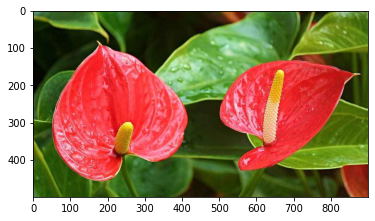

In [ ]:
plt.imshow(img)

In [ ]:
img = img.resize((224, 224))

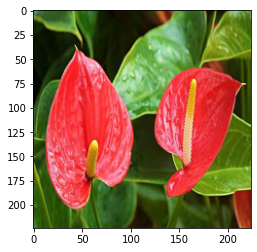

In [ ]:
plt.imshow(img)

In [ ]:
im2arr = tf.keras.preprocessing.image.img_to_array(img)
print(type(im2arr))
# im2arr = np.array(img)
# print(type(im2arr))

<class 'numpy.ndarray'>


In [ ]:
print(im2arr.shape)

(224, 224, 3)


In [ ]:
im2arr = im2arr.reshape(1, 224, 224, 3)
print(im2arr.shape)
# im2arr = np.expand_dims(im2arr, axis=0)

(1, 224, 224, 3)


In [ ]:
im2arr = im2arr.astype('float32')
im2arr = im2arr / 255.0

In [ ]:
pred = model.predict(im2arr)

In [ ]:
np.argmax(pred)

1

In [ ]:
keys = train_gen.class_indices.keys()

In [ ]:
label_names = [] 
for key in keys:
  label_names.append(key)

In [ ]:
label_names[1]

'anthurium'